In [1]:
import cv2 as cv
from matplotlib import pyplot as plt
import scipy.signal as sg 
import scipy.ndimage as sc
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

(900, 1600)

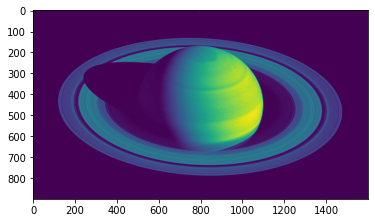

In [2]:
messi = cv.imread('./messi.jpg')
messi = cv.cvtColor(messi, cv.COLOR_BGR2RGB)
saturn = cv.imread('./saturn.jpg')
saturn = cv.cvtColor(saturn, cv.COLOR_BGR2GRAY)
plt.imshow(saturn)
saturn.shape

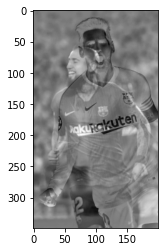

In [3]:
grayguy = cv.cvtColor(messi[:, 0:200], cv.COLOR_BGR2GRAY)
graymessi = cv.cvtColor(messi[:, 200:400], cv.COLOR_BGR2GRAY)
plt.imshow(0.5* grayguy- graymessi *0.5, cmap="gray")
# grayguy.shape
# graymessi.shape

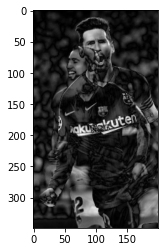

In [4]:
diff= cv.absdiff(graymessi, grayguy)
plt.imshow(diff, cmap= "gray")

In [5]:
saturn.shape

(900, 1600)

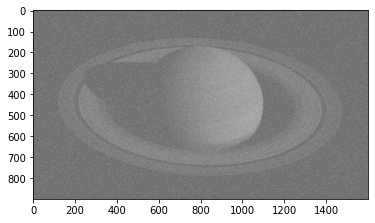

In [6]:
noise = np.random.randn(*saturn.shape) 
# plt.hist(noise, np.linspace(-3,3, 21))
noisy = saturn + noise * 100
plt.imshow(noisy, cmap="gray")

In [7]:
gauss = cv.getGaussianKernel(40, 10)
# fig = plt.figure()
# ax = fig.gca(projection='3d')
kernel = np.multiply(gauss.T,gauss)
# x = y = np.linspace(0,32, 32)
# x , y = np.meshgrid(x ,y)
# plt.contour(x,y,kernel)
# ax.plot_surface(x,y ,kernel,cmap=plt.cm.jet, linewidth=1.0)

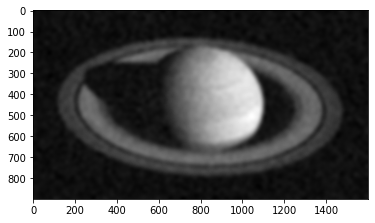

In [8]:
blur_saturn = cv.filter2D(noisy, -1, kernel)
plt.imshow(blur_saturn,cmap='gray')

In [9]:
filtered = sc.correlate(saturn, kernel, mode='nearest')

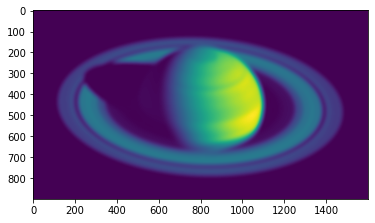

In [10]:
plt.imshow(filtered)

In [11]:
median_fl= sc.median_filter(noisy, size= (40, 20))

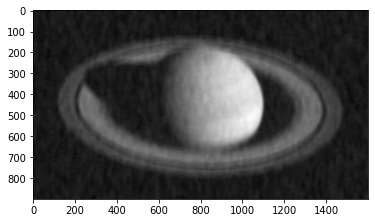

In [12]:
plt.imshow(median_fl,cmap="gray")

In [13]:
a = [-1, 0, 0, 1, 0, 1, 0, -1, -1, 0,1, 1, 0, 0, -1]
b = [1, 1, 0]


In [14]:
def find_template_1D(t, s):
    ls = len(s)
    lt = len(t)
    for i in range(0, ls):
        count= 0
        if (t[0]== s[i]):
            count = count+1
            for j in range(1,lt):
                if(t[j]== s[i+j]):
                    count +=1
                    if(count == lt):
                        return i

In [15]:
def find_template_1D(a, b):
        c=np.correlate(a,b)
        return np.where(c == max(c))[0][0]

In [16]:
c= find_template_1D(a,b)
print(c)

10


### find template 1d implemented using normalized cross correlation

In [17]:
def find_template_1D(t, s):
    a = (t - np.mean(t)) / (np.std(t) * len(t))
    b = (s - np.mean(s)) / (np.std(s))
    c = np.correlate(t, s, 'full')
    return np.where(c == max(c))[0][0]

## 2D Template for finding part of a picture in it 

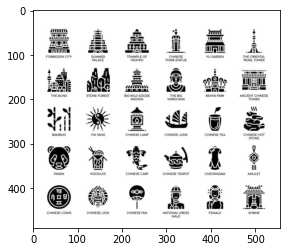

In [18]:
glyph = cv.imread('./glyph.jpg')
glyph = glyph[:,:, 1]
plt.imshow(glyph, cmap = 'gray')
extract = glyph[390:450, 30:88]

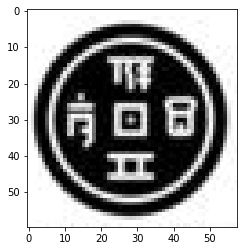

In [19]:
plt.imshow(extract, cmap = 'gray')

In [20]:
print(extract.shape + glyph.shape)

(60, 58, 490, 556)


In [21]:
def find_template_image(origin, extract):
    x , y = extract.shape
    origin = origin/255
    extract = extract/255
    corr=  sg.correlate2d(origin, extract, mode='same')
    return corr

In [22]:
x = find_template_image(glyph, extract)

In [23]:
result = np.where(x == np.amax(x))
print(result)

(array([29, 30, 31, 32]), array([282, 282, 282, 282]))


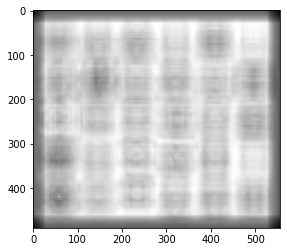

In [24]:
abs_glyph = cv.convertScaleAbs(x)
plt.imshow(x/255, cmap='gray')

In [25]:
np.max(x/255)

7.109127258746613

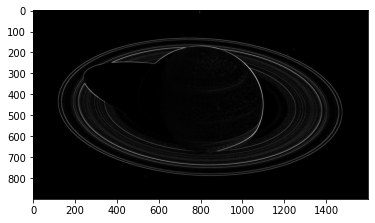

In [26]:
edgemessi_x = cv.Sobel(saturn,ddepth=cv.CV_32F, dx=0, dy=1 )
edgemessi_y = cv.Sobel(saturn,ddepth=cv.CV_32F, dx=1, dy=0 )
abs_x = cv.convertScaleAbs(edgemessi_x)
abs_y = cv.convertScaleAbs(edgemessi_y)
grad = cv.addWeighted(abs_x, 0.5, abs_y, 0.5, 0)
direction = np.arctan2(abs_y,abs_x)
plt.imshow(grad, cmap='gray')

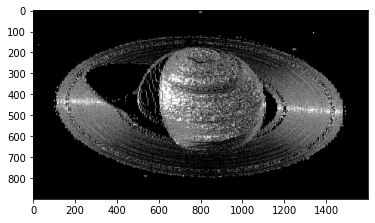

In [27]:
abs_dir = cv.convertScaleAbs(np.float32(direction))
plt.imshow(abs_dir, cmap='gray')

In [28]:
np.mean(abs_dir)

0.29411180555555555

In [29]:
def select_grad(mag, direction, mag_min, angle_low, angle_high):
    out = mag>= mag_min and angle_low <= direction and angle_high >=direction
    return out
    

In [30]:
angle_grad = select_grad(grad.all(), abs_dir, 1, 30, 60)
# plt.imshow(select_grad, cmap= 'gray')

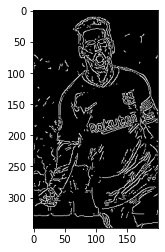

In [45]:
edge_new_messi = cv.Canny(graymessi,90, 100)
plt.imshow(edge_new_messi, cmap = 'gray')

In [51]:
edge_new_messi.std()

74.97626325636611